In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df=pd.read_csv("Downloads/score.csv")
df.head()
# Retuns the first five rows of the data.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
df.describe()
# Describes the statistical analysis of the dataset.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [67]:
df.info()
# the dataset does not consists of the null values in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [68]:
df.shape
# the consists of 25 rows and 2 columns

(25, 2)

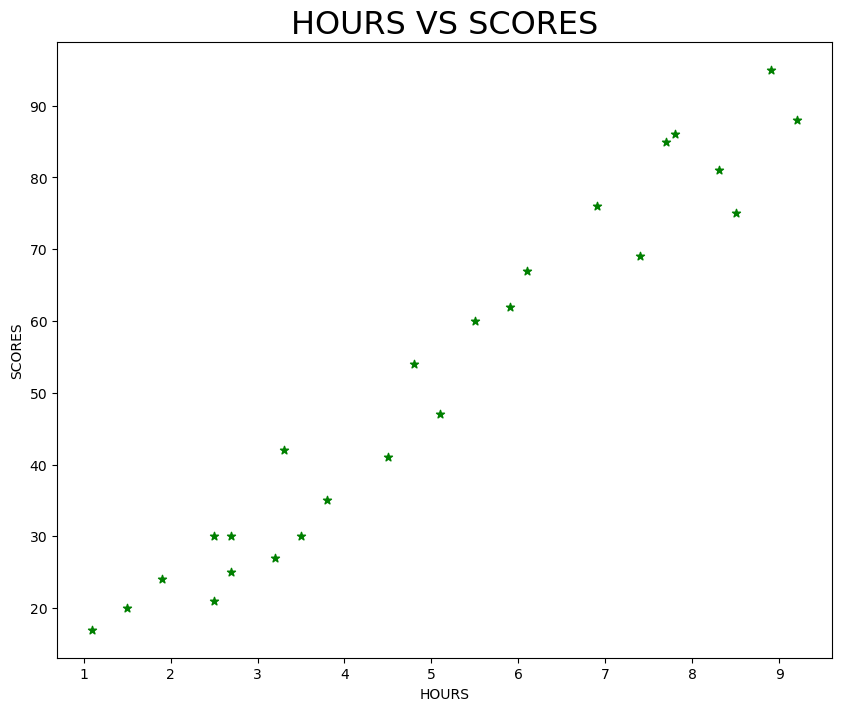

In [69]:
# plotting the graph using bar or scatter plot

plt.figure(figsize=(10,8))
plt.scatter(df["Hours"],df["Scores"],color="green",marker='*')
plt.title("HOURS VS SCORES" ,fontsize=23,color='k')
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.show()

* There's still a positive correlation: more hours studied generally leads to higher scores.

* However, the relationship is not perfectly linear. The points are more scattered compared to your previous plot.

* There is more variance in the data, especially in the lower range of study hours (1 to 4), where scores are less predictable

In [70]:
corr=df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


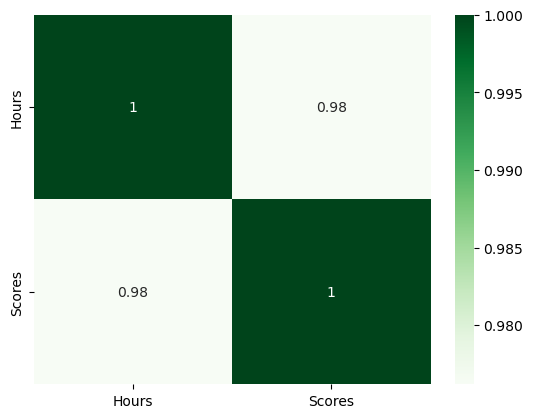

In [71]:
sns.heatmap(corr,annot=True,cmap="Greens")
plt.show()

# the feature and target variable are both highly correlated with each other. which is nearly equal to "1"

In [72]:
from sklearn.model_selection import train_test_split
# splitting data in x and y variables

In [73]:
hours=df["Hours"].values.reshape(-1,1)
hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [74]:
scores=df["Scores"].values.reshape(-1,1)
scores

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
hours_data=sc.fit_transform(hours)
hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [76]:
scores_data=sc.fit_transform(scores)
scores

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [77]:
x_train,x_test,y_train,y_test=(train_test_split(hours_data,scores_data, test_size=0.5,random_state=100))

In [78]:
# the shape of the x and y trained and tested data.
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("ndim of x_train:",x_train.ndim)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (12, 1)
shape of y_train: (12, 1)
ndim of x_train: 2
shape of x_test: (13, 1)
shape of y_test: (13, 1)


# LINEAR REGRESSION

In [79]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
 #fitting the trained data.
model.fit(x_train,y_train)

LinearRegression()

In Linear Regression:
Score: R² value, indicating how well the model fits the data.
Intercept (b): The predicted value of Y when X = 0.
Prediction (y_pred): The estimated Y values from the regression model.(Actual and the Trained data)
Coefficient (Coef, m): The slope, representing the change in Y for a one-unit change in X.

In [80]:
# Score value of the data.indicates how well the model fits the data.
modelvalue=model.score(x_train,y_train)
print("Score of the Linear Regression:\n",modelvalue)

Score of the Linear Regression:
 0.9587757435113509


In [81]:
# Intercept:predicted value of Y
model_intercept=model.intercept_
print("Intercept of Linear Regression:\n",model_intercept)

Intercept of Linear Regression:
 [0.02458047]


In [82]:
# Coefficient: represents how y changes when the value of x changes.
model_coef=model.coef_
print("Coefficient of Linear Regression:\n",model_coef)

Coefficient of Linear Regression:
 [[0.95232686]]


In [83]:
# predicted value of y .
y_pred = model.predict(hours)
y_pred

array([[2.40539761],
       [4.88144744],
       [3.07202641],
       [8.11935875],
       [3.35772447],
       [1.45307075],
       [8.78598755],
       [5.26237818],
       [7.92889338],
       [2.59586298],
       [7.35749727],
       [5.64330892],
       [4.31005132],
       [3.1672591 ],
       [1.07214001],
       [8.50028949],
       [2.40539761],
       [1.8340015 ],
       [5.83377429],
       [7.07179921],
       [2.59586298],
       [4.59574938],
       [3.64342252],
       [6.59563578],
       [7.45272995]])

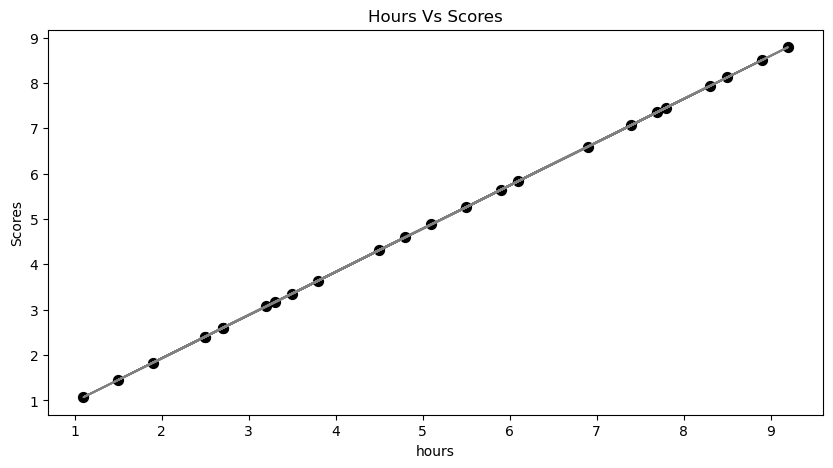

In [84]:
# plotting a graph using the prediction. 
plt.figure(figsize=(10,5))
plt.scatter(df["Hours"],y_pred,c="k",marker="o",s=50,)
plt.plot(df["Hours"],y_pred,c="grey",linewidth=1.5)
plt.xlabel("hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.show()

The data shows a very strong positive linear relationship between the number of hours studied and the scores achieved.

* The linear regression line fits the data almost perfectly, suggesting:

* There is little to no noise in the data.

* The correlation is very close to +1.

* The model likely has a very high R² value, possibly close to 1, meaning the hours studied explain almost all the variance in scores.

In [91]:
from sklearn.preprocessing import PolynomialFeatures

# Features and target
X = df[['Hours']]
y = df['Scores']

# Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions
y_poly_pred = poly_model.predict(X_poly)
y_poly_pred

array([26.96042461, 52.16399642, 33.70789431, 85.70701678, 36.60826268,
       17.3698908 , 92.69516434, 56.07585156, 83.71556058, 28.88540789,
       77.75494498, 59.99687538, 46.31340499, 34.67411072, 13.54972247,
       89.6968057 , 26.96042461, 21.19922782, 61.96082554, 74.78237326,
       28.88540789, 49.23612202, 39.51378842, 69.8395479 , 78.74694831])

C:\Users\mutyalasravanthi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


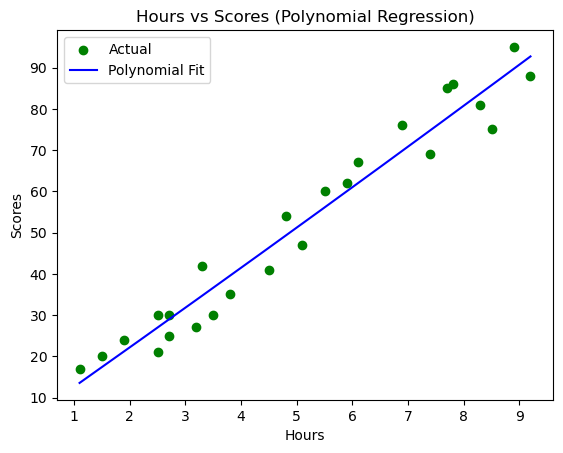

In [94]:
plt.scatter(X, y, color='green', label='Actual')
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
plt.plot(X_seq, poly_model.predict(X_seq_poly), color='blue', label='Polynomial Fit')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Polynomial Regression)")
plt.legend()
plt.show()